# Importing Necessary Libraries & Dataset



In [1]:
#Importing the Libraries Required to Perform the Operations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from collections import  Counter
import nltk
import pickle
import string


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/daaminibatra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daaminibatra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Importing Dataset spam.csv into Dataframe df
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
# Printing First 5 Rows in Dataframe
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Printing any 5 Random Rows in Dataframe
df.sample(5)

,Category,Message
648,spam,PRIVATE! Your 2003 Account Statement for shows...
3688,ham,Great! I shoot big loads so get ready!
3608,ham,I have no idea where you are
1309,ham,I jokin oni lar.. Ã busy then i wun disturb Ã¼.
5380,ham,Its sunny in california. The weather's just cool


In [5]:
# Returns the Shape (Total number of rows and columns) of DataFrame
df.shape

(5572, 2)

## **Data Analysis**

###Operations Performed Throughout the Data Analysis
1. Dataset Cleaning
2. EDA
3. Dataset Preprocessing
4. WordCloud
5. Corpus of ham & spam


### 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
# Renaming the columns Catagory & Message to target and text
df.rename(columns={'Category':'target','Message':'text'},inplace=True)
df.sample(5)

,target,text
3200,ham,No de.am seeing in online shop so that i asked.
577,ham,I'm tired of arguing with you about this week ...
4430,ham,Hey they r not watching movie tonight so i'll ...
5231,ham,I realise you are a busy guy and i'm trying no...
1673,spam,URGENT! We are trying to contact U. Todays dra...


In [8]:
# Initializing the LabelEncoder
encoder = LabelEncoder()

In [9]:
# Replacing ham with 0 and spam with 1 in column 'target'
df['target'] = encoder.fit_transform(df['target'])

In [10]:
# Printing First 5 Rows in Dataframe
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# Checking For Missing Values in Dataframe
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# Checking For Total Number of Duplicate Values in Dataframe
df.duplicated().sum()

415

In [13]:
# Removing all the Other Duplicate Values and Keeping Only First One
df = df.drop_duplicates(keep='first')

In [14]:
# Checking For Total Number of Duplicate Values Again
df.duplicated().sum()

0

In [15]:
# Checking the Shape of DataFrame Again
df.shape

(5157, 2)

### 2. EDA

In [16]:
# Printing First 5 Rows in Dataframe
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# Counts the Total Number of ham(0) and spam(1) in Dataframe
df['target'].value_counts()

0    4516
1     641
Name: target, dtype: int64

**Piechart**

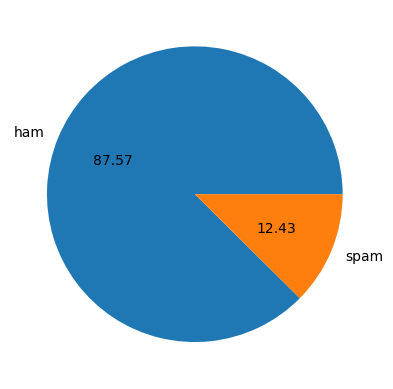

In [18]:
# Piechart representing the percentage composition of ham and spam in the Dataframe
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

**Bargraph**

<Axes: xlabel='target', ylabel='count'>

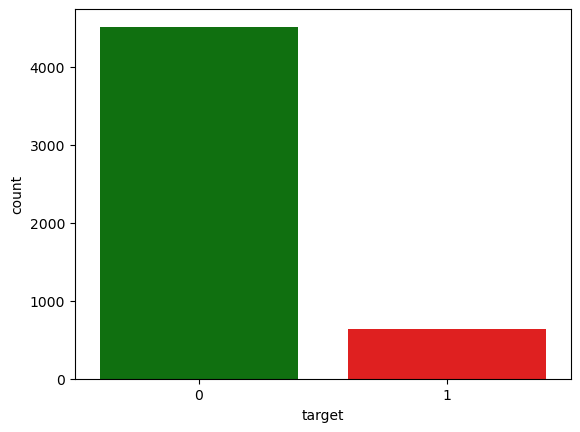

In [19]:
# Prints the BarGraph column 'target' vs their count in the dataframe
sns.countplot(x='target',data=df,palette=['g','r'])

In [20]:
# Counts the total number of characters in column 'text' for each row and saves the count in new column 'num_characters' in the dataframe
df['num_characters'] = df['text'].apply(len)

In [21]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# Counts the total number of words in column 'text' in each row and saves the count in new column 'num_words' in the dataset
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
# Counts the total number of sentences in column 'text' in each row and saves the count in new column 'num_sentences' in the dataframe
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


**Histograms**

In [26]:
# Generate descriptive statistics for 'num_characters','num_words','num_sentences' in the Dataframe
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.228040,18.542370,1.950553
std,58.451149,13.401466,1.362981
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
# Generate descriptive statistics for 'num_characters','num_words','num_sentences' of ham in the Dataframe
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.951063,17.247786,1.806244
std,56.730031,13.581498,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
# Generate descriptive statistics for 'num_characters','num_words','num_sentences' of spam in the Dataframe
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.541342,27.663027,2.967239
std,30.516111,7.104050,1.480241
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<Axes: xlabel='num_characters', ylabel='Count'>

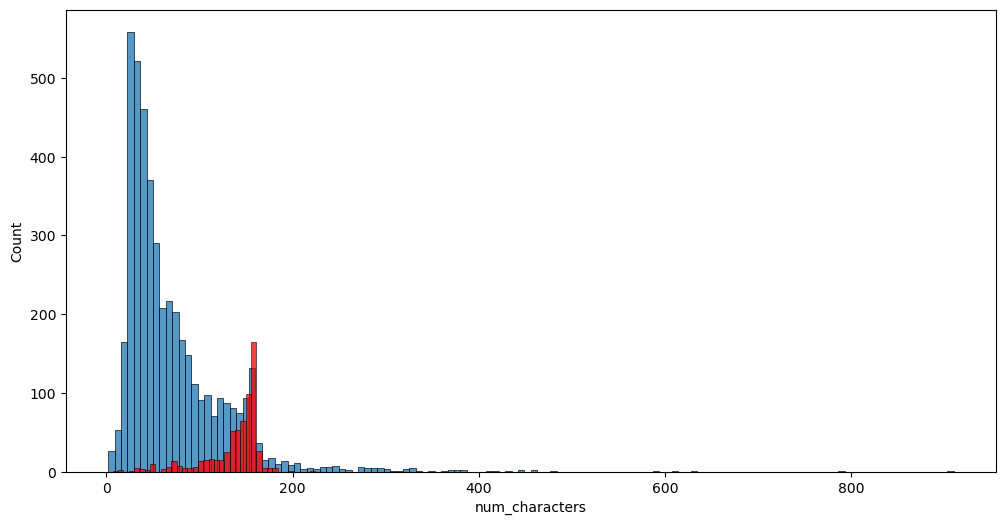

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

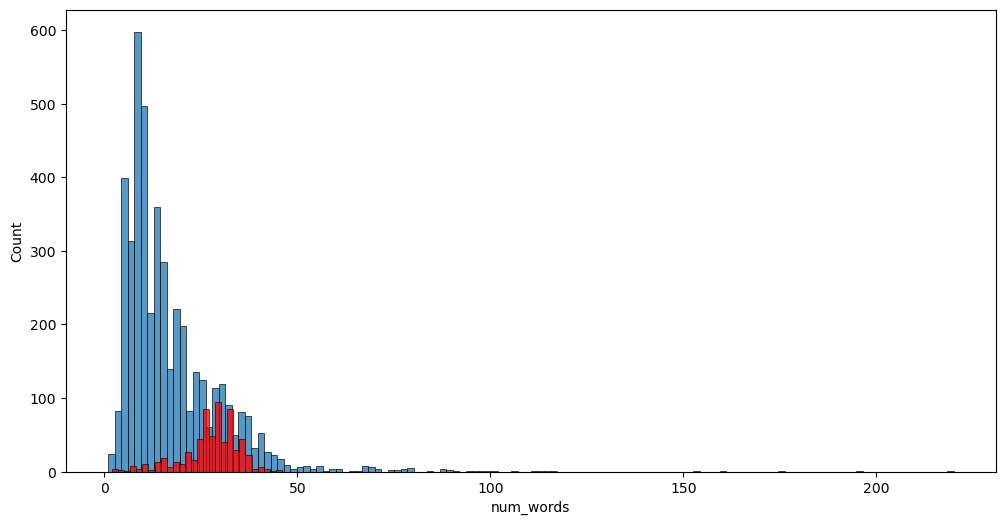

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

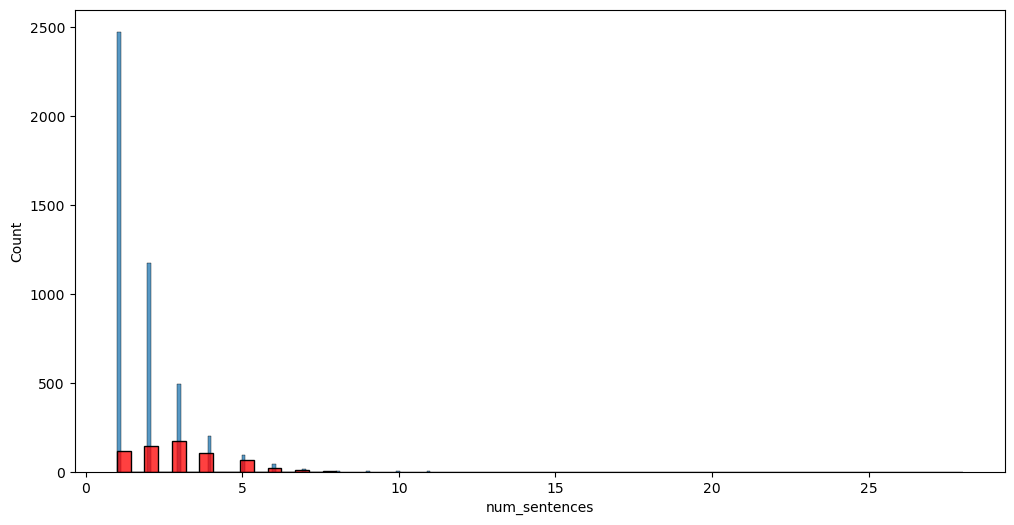

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

**Pairplot**

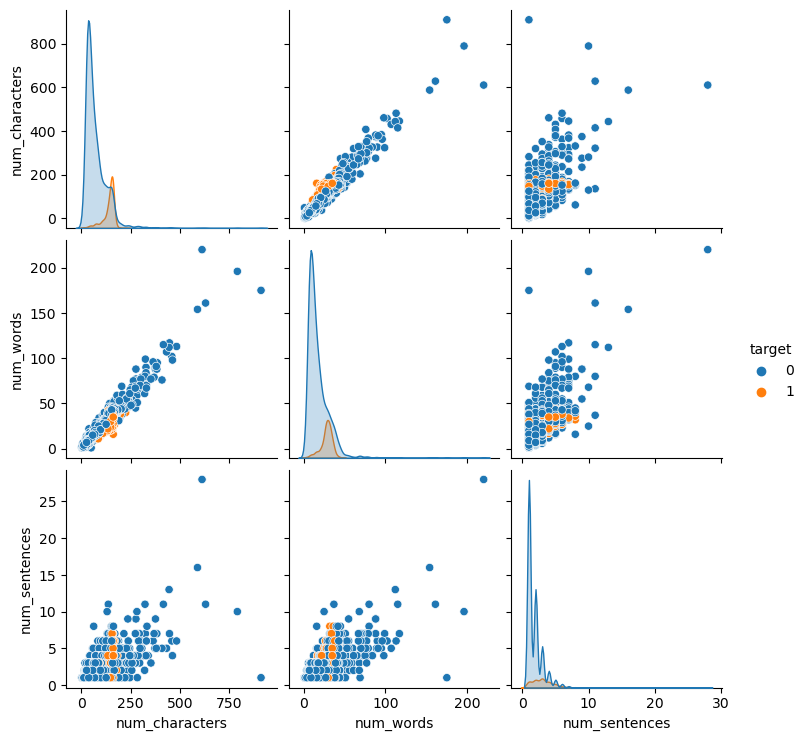

In [32]:
# A pairplot plot a pairwise relationships in a dataset
sns.pairplot(df,hue='target')

**Heatmap**

In [33]:
df_heatmap=df.select_dtypes(exclude='object')
df_heatmap.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.375897,0.256429,0.281055
num_characters,0.375897,1.000000,0.966015,0.636541
num_words,0.256429,0.966015,1.000000,0.683456
num_sentences,0.281055,0.636541,0.683456,1.000000


<Axes: >

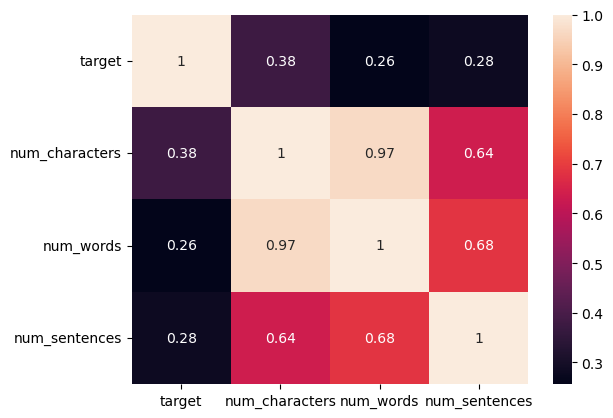

In [34]:
# Generate the heatmap of the for the columns in Dataset
sns.heatmap(df_heatmap.corr(),annot=True)

### 3. Dataset Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stopwords and punctuation
- Stemming

In [35]:
# Initializing PorterStemmer Class
ps = PorterStemmer()

In [36]:
"""
This Function performs following operations on sentence in text column in each row in Dataset:
1. Converts all uppercase characters to lowercase characters
2. Tokenize the sentence
3. Removes all special characters from sentence
4. Removes stopwords and punctuations from sentence
5. Perform stemming on sentence
"""

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [37]:
# Saves new generated sentence in new coulumn transformed_text after performing trandform_text function on sentence in text column of each row in Dataset
df['transformed_text'] = df['text'].apply(transform_text)

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### 4. WordCloud
Wordcloud is basically a visualization technique to represent the frequency of words in a text where the size of the word represents its frequency

In [39]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

**Spam WordCloud**

In [40]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

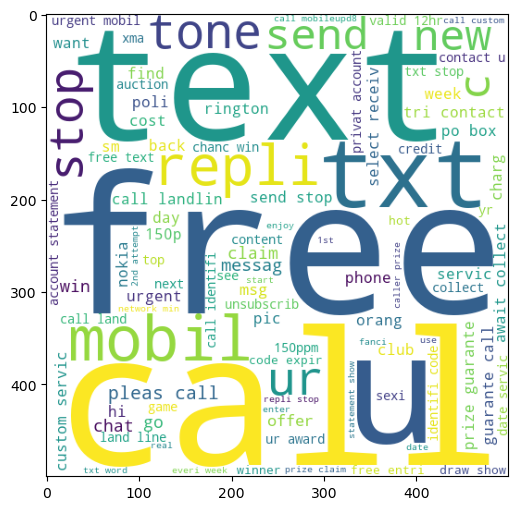

In [41]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

**Ham WordCloud**

In [42]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

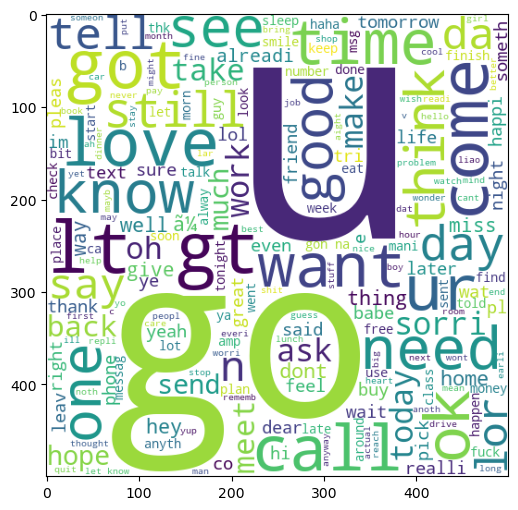

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

### 5. Creating Corpus of ham & spam
A corpus can be defined as a collection of text documents

**Creating spam Corpus**

In [44]:
# Spliting spam sentences in column 'transformed_text' into Words

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [45]:
# Total number of words in spam corpus

len(spam_corpus)

9774

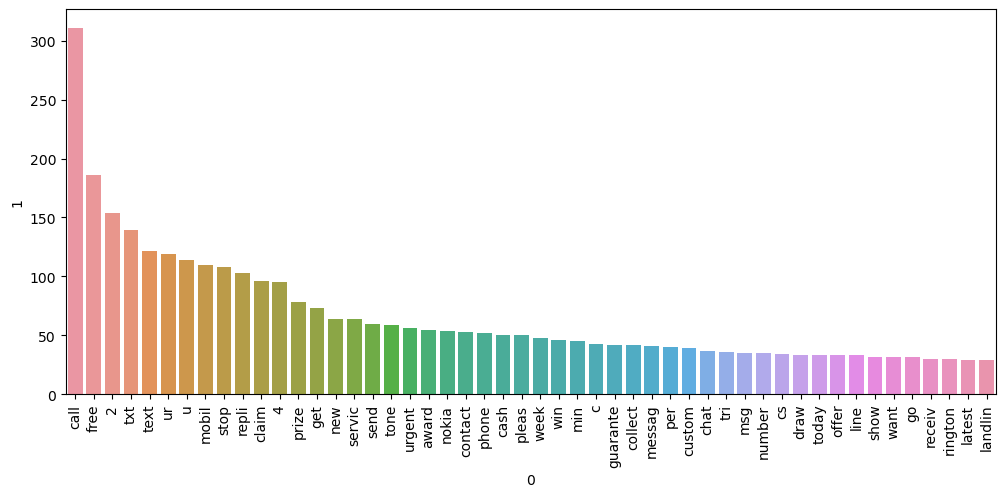

In [46]:
# Plots Bargraph of Top 50 spam Words vs their frequency in the dataset

a=pd.DataFrame(Counter(spam_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(spam_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)

plt.show()

**Creating ham Corpus**

In [47]:
# Spliting ham sentences in column 'transformed_text' into Words

ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [48]:
# Total number of words in ham corpus

len(ham_corpus)

35869

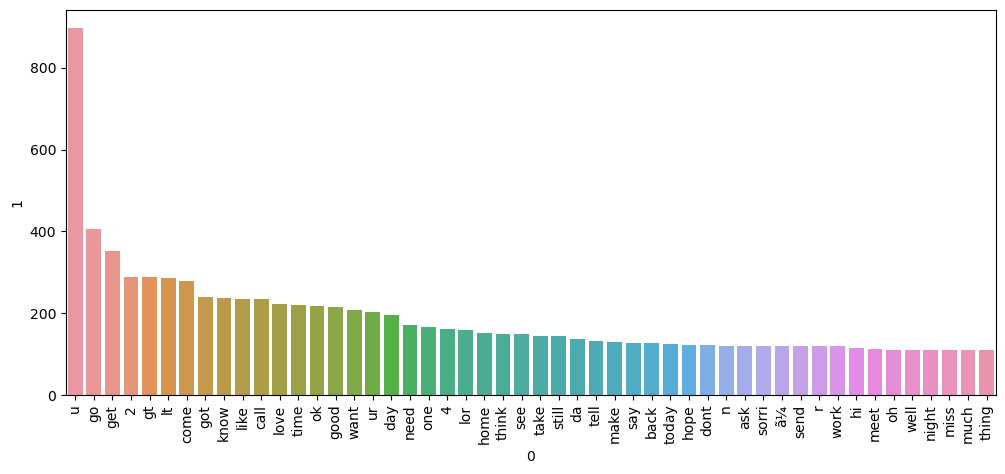

In [49]:
# Plots Bargraph of Top 50 ham Words vs their count in the dataset

a=pd.DataFrame(Counter(ham_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(ham_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)

plt.show()

##**Models Training Using Various Algorithms**

**Vectorization**

In [50]:
# Initializing TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [51]:
# Independent Feature
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [52]:
# Dependent Feature
y = df["target"].values

In [53]:
# Performing Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

**Training Models**


In [54]:
# Models that are going to be trained
models={
    "Gaussian NB" : GaussianNB(),
    "Multinomial NB" : MultinomialNB(),
    "Bernoulli NB" : BernoulliNB(),
    "Logistic Regression" : LogisticRegression(),
    "SVC" : SVC(),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNN" : KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "ETC" : ExtraTreesClassifier(),
    "XGB" : XGBClassifier(),
}

In [55]:
# Creating a function train each model and calculate & return accuracy and precision
def train_model (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [56]:
# A for loop Calls "train_model" for each model and stores accuracy and precision
accuracy_s=[]
precision_s=[]

for name, model in models.items():
    accuracy, precision = train_model(model, X_train, y_train, X_test, y_test)

    accuracy_s.append(accuracy)
    precision_s.append(precision)

In [57]:
# As Precision matter over Accuracy in this Data, Sorting in DESC order of Precision. All Scores of Models
scores_df = pd.DataFrame({"Algorithm": models.keys(),
                          "Accuracy": accuracy_s,
                         "Precision": precision_s}).sort_values(by="Precision", ascending=False)

##**Observations (Comparing Accuracy And Precision)**

**Observation Table**

In [58]:
# Printing the Accuracy and Scores of all the Models trained with following Algorithms
scores_df

,Algorithm,Accuracy,Precision
1,Multinomial NB,0.972868,1.000000
4,SVC,0.973837,1.000000
6,KNN,0.912791,1.000000
7,Random Forest,0.971899,1.000000
8,ETC,0.976744,0.990476
2,Bernoulli NB,0.983527,0.982456
9,XGB,0.975775,0.981132
3,Logistic Regression,0.958333,0.966667
5,Decision Tree,0.945736,0.819820
0,Gaussian NB,0.867248,0.478070


**Observation BarPlot**

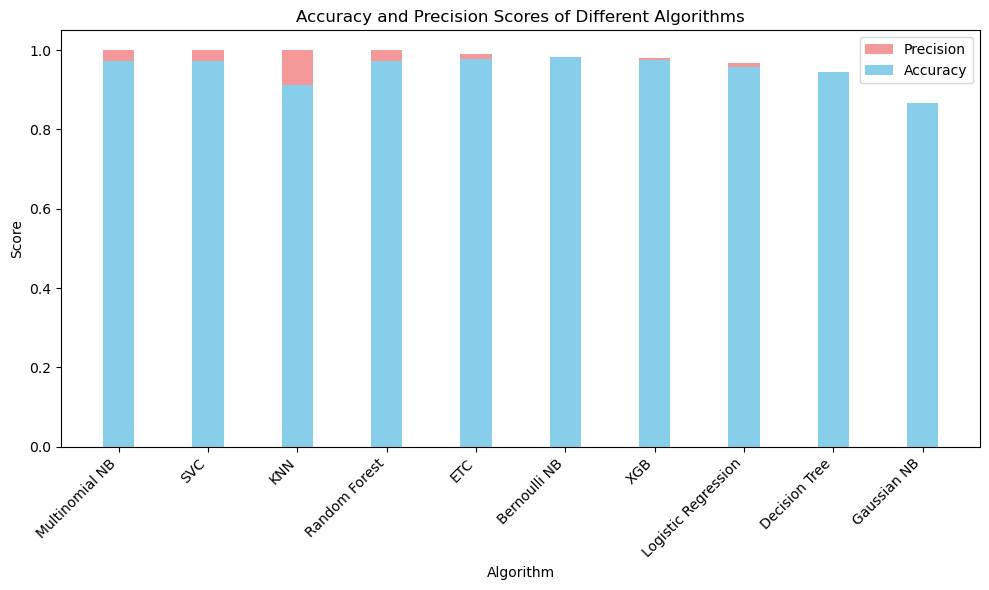

In [59]:
plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(scores_df["Algorithm"], scores_df["Precision"], width=bar_width, label="Precision", color='lightcoral', alpha=0.8)
plt.bar(scores_df["Algorithm"], scores_df["Accuracy"], width=bar_width, label="Accuracy", color='skyblue')
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.title("Accuracy and Precision Scores of Different Algorithms")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

##**Choosing Best Suitable Algorithm For Model**
Choosing Best Suitable Algorithm For Model After Comparing Accuracy and Precision of All Algorithms After Training

In [60]:
# Hence Multinomial Naïve Bayes Classifier give excellent precision and accuracy scores.
mnb=MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

##**Generating Pickle Files**

In [61]:
# Generating 2 Pickle Files : 'vectorizer.pkl' & 'model.pkl'
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))